In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_traj = np.loadtxt('xtraj_resname_POT.dat')
y_traj = np.loadtxt('ytraj_resname_POT.dat')
z_traj_POT = np.loadtxt('ztraj_resname_POT.dat')
# z_traj_CLA = np.loadtxt('ztraj_resname_CLA.dat')
# print(
    # x_traj.shape,
    # y_traj.shape,
    # z_traj.shape
# )

## output : (100, 534) (100, 534) (100, 534)

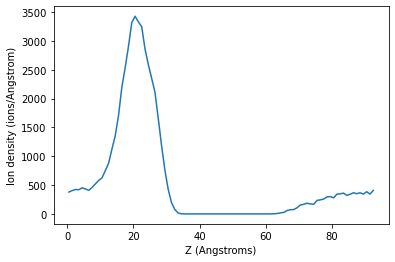

In [4]:
bin_width = 1 #angstroms

#calculate ions per nth angstrom
bins = np.arange(np.floor(z_traj_POT.min()), np.ceil(z_traj_POT.max()), bin_width)
hist, _ = np.histogram(a=z_traj_POT, bins=bins)

hist = hist / bin_width #get density

#get center of bins (drops array length by 1)
z_centers = (bins[1:] + bins[:-1]) / 2
plt.plot(z_centers, hist)
plt.xlabel('Z (Angstroms)')
plt.ylabel('Ion density (ions/Angstrom)')
plt.show()


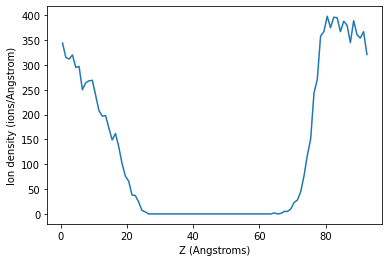

In [5]:
bin_width = 1 # Angstroms

#calculate ions per nth angstrom
bins = np.arange(np.floor(z_traj_CLA.min()), np.ceil(z_traj_CLA.max()), bin_width)
hist, _ = np.histogram(a=z_traj_CLA, bins=bins)

hist = hist / bin_width #get density

#get center of bins (drops array length by 1)
z_centers = (bins[1:] + bins[:-1]) / 2
plt.plot(z_centers, hist)
plt.xlabel('Z (Angstroms)')
plt.ylabel('Ion density (ions/Angstrom)')
plt.show()


In [10]:
traj = np.stack([x_traj, y_traj, z_traj_POT], axis=-1)
traj.shape

(100, 534, 3)

In [7]:
velocities = np.ndarray((100, 534))
for i in range(99):
    dist = x_traj[i+1, :] - x_traj[i, :]
    velocity = dist / 10
    velocities[i, :] = velocity

velocities

array([[ 8.67062569e-002,  8.23974609e-002, -1.50303650e-001, ...,
        -1.84580231e-001,  1.12969742e+000,  9.66966629e-002],
       [-7.97236443e-002,  1.06394196e-001,  3.74349976e-001, ...,
         1.45045471e-001, -1.00350189e-001,  4.90974426e-001],
       [-2.18234921e-001,  7.38993073e-001, -1.58543396e-001, ...,
        -1.70726013e-001, -5.90843201e-002,  6.08240128e-002],
       ...,
       [-1.05806808e+000, -4.48883057e-002,  6.34536934e-001, ...,
        -5.92324829e-001, -5.30934143e-001,  3.52537537e-001],
       [ 1.60422592e+000, -1.78306580e-002, -2.64646721e-001, ...,
         9.33647156e-002,  1.46485901e+000, -1.54595627e+001],
       [ 4.67923012e-310,  4.47080003e-320,  4.67923012e-310, ...,
         4.67923012e-310,  5.42484079e-321,  0.00000000e+000]])

Text(0.5, 0.92, 'wireframe')

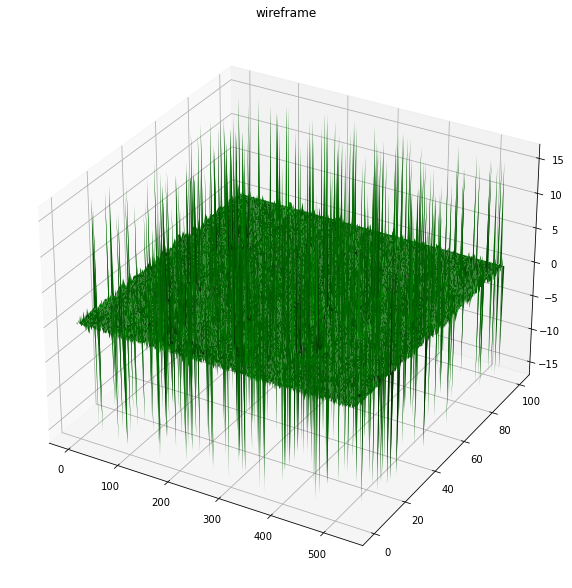

In [15]:
x = np.linspace(0, 534, 534)
y = np.linspace(0, 100, 100)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 12))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, velocities, color = 'green')
ax.set_title('wireframe')